In [ ]:
%%sql

Use `db_course_conversions`;


In [45]:
%%sql
SELECT 
    si.student_id,
    si.date_registered,
    MIN(se.date_watched) AS first_date_watched,
    MIN(sp.date_purchased) AS first_date_purchased,
    DATEDIFF(MIN(se.date_watched), si.date_registered) AS date_diff_reg_watch,
    DATEDIFF(MIN(sp.date_purchased),
            MIN(se.date_watched)) AS date_diff_watch_purch
FROM
    student_info si 
        inner JOIN
     student_engagement se
     ON se.student_id = si.student_id
        LEFT JOIN
    student_purchases sp ON se.student_id = sp.student_id
GROUP BY si.student_id
HAVING   MIN(sp.date_purchased) IS NULL or MIN(se.date_watched) <= MIN(sp.date_purchased)
;
    
   

,student_id,date_registered,first_date_watched,first_date_purchased,date_diff_reg_watch,date_diff_watch_purch
0,255193,2021-12-01,2021-12-01,NaN,0,NaN
1,255194,2021-12-01,2021-12-01,NaN,0,NaN
2,255198,2021-12-01,2022-02-17,NaN,78,NaN
3,255199,2021-12-01,2021-12-01,NaN,0,NaN
4,255200,2021-12-01,2021-12-01,NaN,0,NaN
...,...,...,...,...,...,...
20250,296916,2022-10-30,2022-10-30,NaN,0,NaN
20251,296918,2022-10-30,2022-10-30,NaN,0,NaN
20252,296922,2022-10-30,2022-10-30,NaN,0,NaN
20253,296926,2022-10-30,2022-10-30,NaN,0,NaN


In [46]:
# Total number of students
total_nu_students = len(df_student)

# Total number of purchases (where 'date_diff_watch_purch' is not null)
total_of_purchases = len(df_student[df_student['date_diff_watch_purch'].notna()])

# Conversion rate as a percentage
conversion_rate = total_of_purchases / total_nu_students * 100

# Average duration between the date of registration and the date of first-time engagement
avg_re_watch = df_student['date_diff_reg_watch'].mean()

# Average duration between first-time engagement and first-time purchase
avg_first_pur = df_student['date_diff_watch_purch'].mean()

In [47]:
print("Summary of Key Metrics:")
print("------------------------")
print(f"Total Number of Students: {total_nu_students}")
print(f"Total Number of Purchases: {total_of_purchases}")

print(f"Conversion Rate: {conversion_rate:.2f}%")
print('If you google the average conversion rate for online courses, itll be about 1,5% to 2%/n/n/n')

print(f"Average Duration from Registration to First-Time Engagement: {avg_re_watch:.2f} days")
print('Medium Duration (Within a Few Days)/n')


print(f"Average Duration from First-Time Engagement to First-Time Purchase: {avg_first_pur:.2f} days")



Summary of Key Metrics:
------------------------
Total Number of Students: 20255
Total Number of Purchases: 2286
Conversion Rate: 11.29%
If you google the average conversion rate for online courses, itll be about 1,5% to 2%/n/n/n
Average Duration from Registration to First-Time Engagement: 3.42 days
Medium Duration (Within a Few Days)/n
Average Duration from First-Time Engagement to First-Time Purchase: 26.25 days


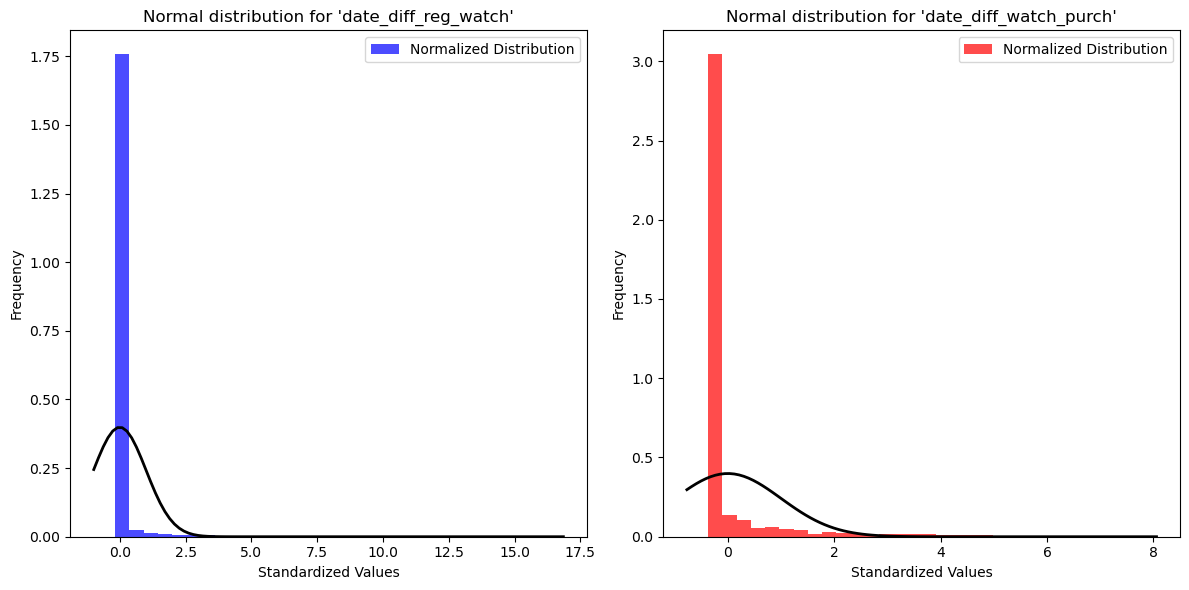

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import norm

# Assuming 'date_diff_reg_watch' and 'date_diff_watch_purch' are the columns in your DataFrame
# Replace these with the actual column names in your DataFrame
# For example, df_student['date_diff_reg_watch'] and df_student['date_diff_watch_purch']


selected_columns = ['date_diff_reg_watch', 'date_diff_watch_purch']
df_selected = df_student[selected_columns]

# Standardize the selected columns using StandardScaler
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_selected), columns=selected_columns)

# Plot the normalized distributions
plt.figure(figsize=(12, 6))

# Plot for 'date_diff_reg_watch'
plt.subplot(1, 2, 1)
plt.hist(df_normalized['date_diff_reg_watch'], bins=30, density=True, alpha=0.7, color='blue', label='Normalized Distribution')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df_normalized['date_diff_reg_watch'].mean(), df_normalized['date_diff_reg_watch'].std())
plt.plot(x, p, 'k', linewidth=2)
title = "Normal distribution for 'date_diff_reg_watch'"
plt.title(title)
plt.xlabel('Standardized Values')
plt.ylabel('Frequency')
plt.legend()




# Plot for 'date_diff_watch_purch'
plt.subplot(1, 2, 2)
plt.hist(df_normalized['date_diff_watch_purch'], bins=30, density=True, alpha=0.7, color='red', label='Normalized Distribution')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df_normalized['date_diff_watch_purch'].mean(), df_normalized['date_diff_watch_purch'].std())
plt.plot(x, p, 'k', linewidth=2)
title = "Normal distribution for 'date_diff_watch_purch'"
plt.title(title)
plt.xlabel('Standardized Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [49]:
from scipy.stats import skew

# Assuming 'date_diff_reg_watch' and 'date_diff_watch_purch' are the columns in your DataFrame
# Replace these with the actual column names in your DataFrame
# For example, df_student['date_diff_reg_watch'] and df_student['date_diff_watch_purch']

# Calculate skewness for 'date_diff_reg_watch'
skew_reg_watch = skew(df_student['date_diff_reg_watch'])

# Calculate skewness for 'date_diff_watch_purch'
skew_watch_purch = skew(df_student['date_diff_watch_purch'])

# Print the skewness values
print(f"Skewness for 'date_diff_reg_watch': {skew_reg_watch}")
print(f"Skewness for 'date_diff_watch_purch': {skew_watch_purch}")


Skewness for 'date_diff_reg_watch': 8.73765440811251
Skewness for 'date_diff_watch_purch': nan


In [50]:


# Calculate z-scores for 'date_diff_reg_watch'
z_scores_reg_watch = zscore(df_student['date_diff_reg_watch'])

# Calculate z-scores for 'date_diff_watch_purch'
z_scores_watch_purch = zscore(df_student['date_diff_watch_purch'])

# Define a z-score threshold for outlier detection
z_threshold = 3.0

# Filter outliers for 'date_diff_reg_watch'
filtered_df_reg_watch = df_student[abs(z_scores_reg_watch) <= z_threshold]

# Filter outliers for 'date_diff_watch_purch'
filtered_df_watch_purch = df_student[abs(z_scores_watch_purch) <= z_threshold]

# Combine both filtered DataFrames into the same DataFrame
filtered_df_combined = pd.concat([filtered_df_reg_watch, filtered_df_watch_purch])

# Display the summary statistics of the combined filtered DataFrame
print(filtered_df_combined.describe())


          student_id  date_diff_reg_watch  date_diff_watch_purch
count   19916.000000         19916.000000            2250.000000
mean   276705.878590             1.248795              25.627556
std     12347.621611             5.799557              70.684734
min    255193.000000             0.000000               0.000000
25%    265765.750000             0.000000               0.000000
50%    276901.500000             0.000000               1.000000
75%    287578.250000             0.000000               7.000000
max    296931.000000            61.000000             573.000000
